|key|value|
|----|-----|
|Name:|M.Hamza|
|CMS ID:|407251|
|Course:|Machine Learning CS-470|
|Lab:|13|

In [ ]:
!pip install numpy==1.26.4

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Hands On Feature Engineering

In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Example Dataset
data = {'Age': [25, None, 35, 29], 'Salary': [50000, 54000, None, 58000]}
df = pd.DataFrame(data)
df

,Age,Salary
0,25.0,50000.0
1,NaN,54000.0
2,35.0,NaN
3,29.0,58000.0


## Imputation

### Numerical Imputation with Mean

In [3]:
# Numerical Imputation with Mean
imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])
df

,Age,Salary
0,25.000000,50000.0
1,29.666667,54000.0
2,35.000000,NaN
3,29.000000,58000.0


### Categorical Imputation (replace NaN with 'Unknown')

In [4]:
# Categorical Imputation (replace NaN with 'Unknown')
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())
df

,Age,Salary
0,25.000000,50000.0
1,29.666667,54000.0
2,35.000000,54000.0
3,29.000000,58000.0


## Encoding

### One Hot Encoding

In [5]:
from sklearn.preprocessing import LabelEncoder

# Example Dataset
data = {'City': ['London', 'Paris', 'Berlin']}
df = pd.DataFrame(data)

# One-Hot Encoding
one_hot = pd.get_dummies(df['City'])
one_hot

,Berlin,London,Paris
0,False,True,False
1,False,False,True
2,True,False,False


### Label Encoding

In [6]:
# Label Encoding
le = LabelEncoder()
df['City_Label'] = le.fit_transform(df['City'])
df

,City,City_Label
0,London,1
1,Paris,2
2,Berlin,0


## Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Example Dataset
data = {'Age': [25, 35, 29], 'Salary': [50000, 54000, 58000]}
df = pd.DataFrame(data)

### Standardization

In [8]:
scaler = StandardScaler()
df[['Age', 'Salary']] = scaler.fit_transform(df[['Age', 'Salary']])
df

,Age,Salary
0,-1.135550,-1.224745
1,1.297771,0.000000
2,-0.162221,1.224745


### Normalization

In [9]:
normalizer = MinMaxScaler()
df[['Age', 'Salary']] = normalizer.fit_transform(df[['Age', 'Salary']])
df

,Age,Salary
0,0.0,0.0
1,1.0,0.5
2,0.4,1.0


## Creating Interaction Features

In [10]:
data = {'Bedrooms': [3, 4, 2], 'House_Size': [1000, 1200, 800]}
df = pd.DataFrame(data)

# Interaction Feature
df['Rooms_per_Square_Meter'] = df['Bedrooms'] / df['House_Size']
df

,Bedrooms,House_Size,Rooms_per_Square_Meter
0,3,1000,0.003000
1,4,1200,0.003333
2,2,800,0.002500


## Log Transformation

In [11]:
import numpy as np

data = {'Income': [1000, 10000, 50000, 100000]}
df = pd.DataFrame(data)

df['Log_Income'] = np.log1p(df['Income'])
df

,Income,Log_Income
0,1000,6.908755
1,10000,9.210440
2,50000,10.819798
3,100000,11.512935


## Polynomial Features

In [12]:
from sklearn.preprocessing import PolynomialFeatures

# Example Dataset
data = {'Feature': [2, 3, 4]}
df = pd.DataFrame(data)

# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
polynomial_features = poly.fit_transform(df[['Feature']])
polynomial_features

array([[ 2.,  4.],
       [ 3.,  9.],
       [ 4., 16.]])

## Binning

In [13]:
# Example Dataset
data = {'Age': [25, 35, 29, 50, 60]}
df = pd.DataFrame(data)

# Binning
bins = [0, 30, 50, 100]
labels = ['Young', 'Middle-Aged', 'Senior']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
df

,Age,Age_Group
0,25,Young
1,35,Middle-Aged
2,29,Young
3,50,Middle-Aged
4,60,Senior


# Hands On With Feature Selection

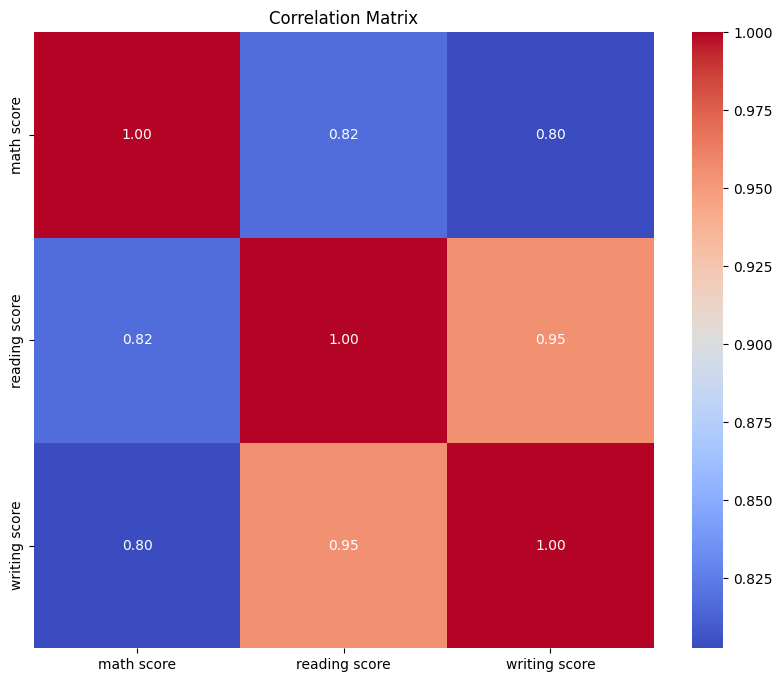

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("students_performance.csv")

# Filter numeric columns
numeric_data = data.select_dtypes(include=["number"])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Visualize the matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Drop Feature with high correlation (> 0.85)

In [15]:
threshold = 0.85
high_corr_pairs = [
    (col1, col2)
    for col1 in correlation_matrix.columns
        for col2 in correlation_matrix.columns
            if abs(correlation_matrix[col1][col2]) > threshold and col1 != col2
]
# Output the highly correlated pairs
print("Highly correlated pairs (|correlation| > 0.85):")
for col1, col2 in high_corr_pairs:
    print(f"{col1} - {col2}: {correlation_matrix[col1][col2]:.2f}")

Highly correlated pairs (|correlation| > 0.85):
reading score - writing score: 0.95
writing score - reading score: 0.95


## Univariate Features

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Check column names
print("Dataset columns:", data.columns)

# Ensure 'passed_all' exists (modify this logic as per your requirement)
if "passed_all" not in data.columns:
    # Example logic: Passed all exams if scores are >= 50
    data["passed_all"] = (data["math score"] >= 50) & (data["reading score"] >= 50) & (data["writing score"] >= 50)

# Encode categorical columns using one-hot encoding
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Define features and target
X = data_encoded.drop(columns=["passed_all"])
y = data_encoded["passed_all"]

# Apply ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)

# Display selected feature scores
selected_features = X.columns[selector.get_support()]
print("Selected Features:", list(selected_features))

Dataset columns: Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')
Selected Features: ['math score', 'reading score', 'writing score', 'lunch_standard', 'test preparation course_none']


## Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Initialize model
model = RandomForestClassifier()

# Apply RFE
rfe_selector = RFE(estimator=model, n_features_to_select=5, step=1)
X_rfe = rfe_selector.fit_transform(X, y)

# Get selected features
selected_rfe_features = X.columns[rfe_selector.support_]
print("RFE Selected Features:", list(selected_rfe_features))

RFE Selected Features: ['math score', 'reading score', 'writing score', 'gender_male', 'lunch_standard']


## Feature importance from tree based model

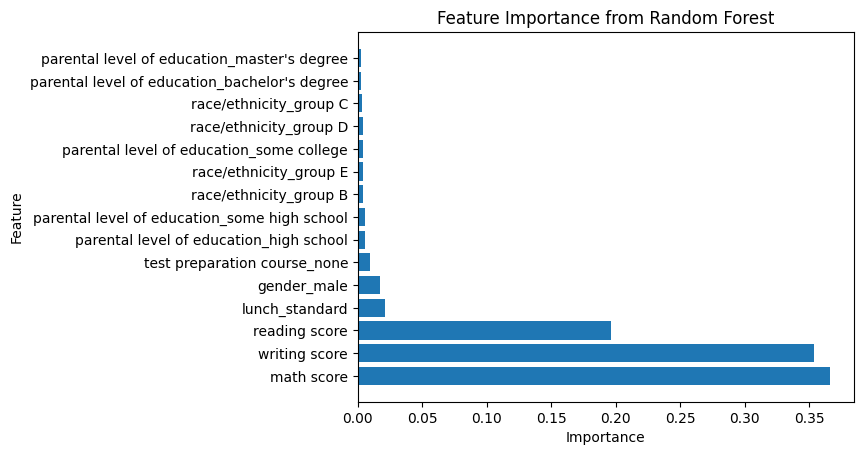

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Train Random Forest model
model = RandomForestClassifier()
model.fit(X, y)

# Plot feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.barh(X.columns[indices], importances[indices])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance from Random Forest")
plt.show()

## Regularization

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Apply Lasso for feature selection
lasso = Lasso(alpha=0.01)
lasso.fit(X, y)

# Select features with non-zero coefficients
lasso_selector = SelectFromModel(lasso, prefit=True)
X_lasso = lasso_selector.transform(X)

# Get selected features
selected_lasso_features = X.columns[lasso_selector.get_support()]
print("Lasso Selected Features:", list(selected_lasso_features))

Lasso Selected Features: ['math score', 'writing score']


/Users/truid/Desktop/TEST/lab13/env/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


# Visualizing Feature Importance

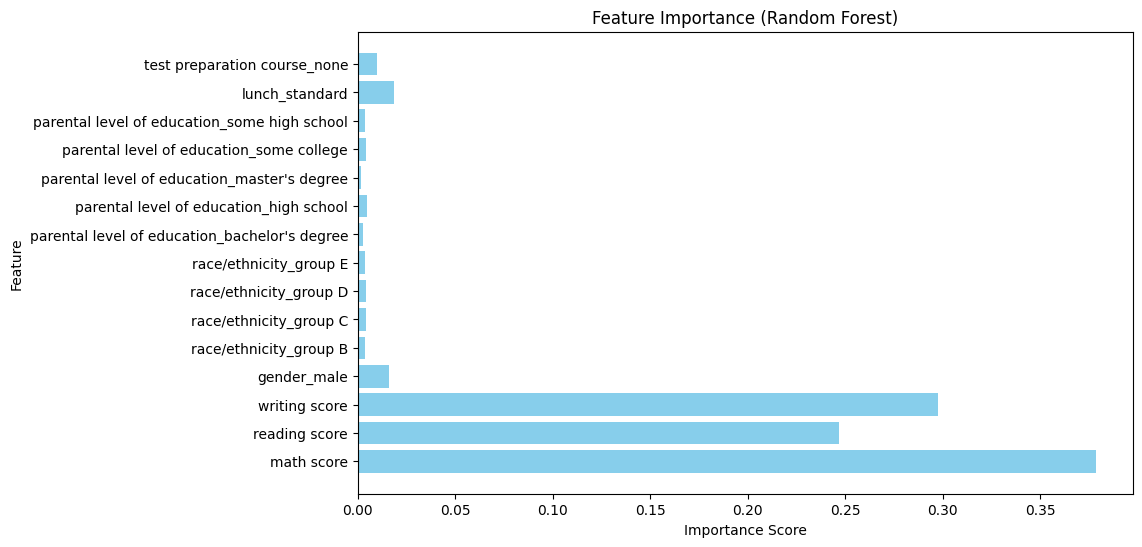

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
features = X.columns
# Plot
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color="skyblue")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance (Random Forest)")
plt.show()

## Shap Summary Plot

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


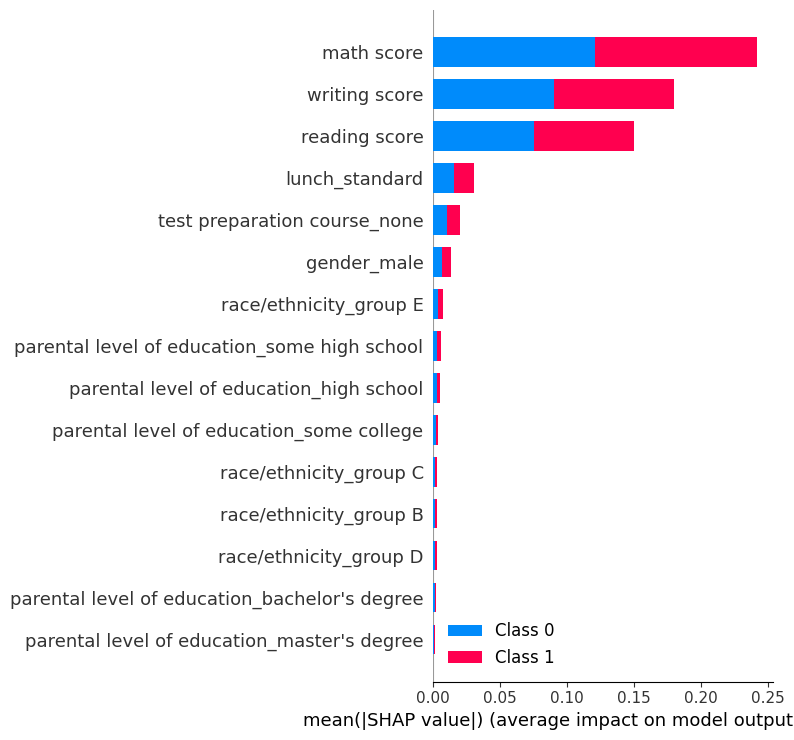

In [ ]:
import shap

# Explain model predictions
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# SHAP summary plot
shap.summary_plot(shap_values, X)

## Permutation Importance

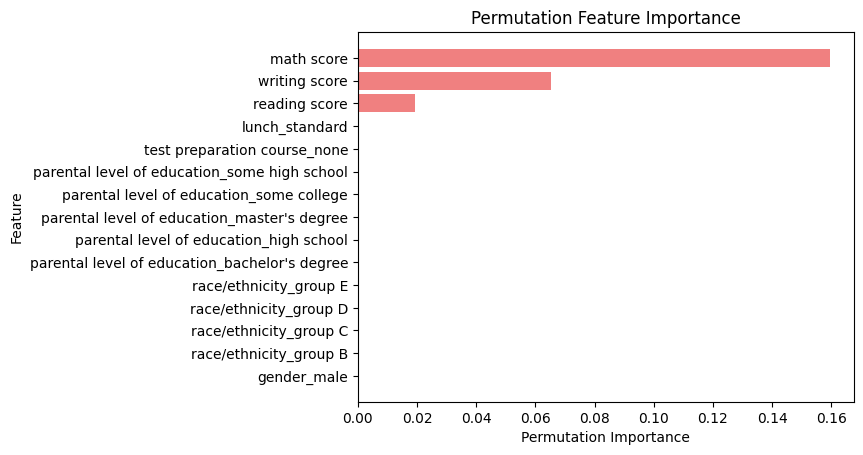

In [ ]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(model, X, y, scoring="accuracy")

# Plot
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx], 
color="lightcoral")
plt.xlabel("Permutation Importance")
plt.ylabel("Feature")
plt.title("Permutation Feature Importance")
plt.show()

# Mini Challenge

In [24]:
dataset = pd.read_csv('archive/Weather Training Data.csv')
dataset.head()

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0


## Feature Engineering

### Remove unnecessary Features

In [25]:
dataset = dataset.drop(columns=['row ID'])
dataset.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0


### Handling missing values

In [26]:
dataset.shape

(99516, 22)

In [27]:
dataset.isna().sum()

Location             0
MinTemp            443
MaxTemp            230
Rainfall           979
Evaporation      42531
Sunshine         47317
WindGustDir       6521
WindGustSpeed     6480
WindDir9am        7006
WindDir3pm        2648
WindSpeed9am       935
WindSpeed3pm      1835
Humidity9am       1233
Humidity3pm       2506
Pressure9am       9748
Pressure3pm       9736
Cloud9am         37572
Cloud3pm         40002
Temp9am            614
Temp3pm           1904
RainToday          979
RainTomorrow         0
dtype: int64

Here as we can see, we have some features with zero missing values. some with under 10k and some with above 10k.

Features that have missing values less than 10k, we will be imputing those values. For the remaining values, I will train a random forest model to predict them.

In [28]:
okay_features = ['Location', 'RainTomorrow']
cols_with_missing_values = [col for col in dataset.columns if col not in okay_features]
over_10k = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']
under_10k = [v for v in dataset.columns if v not in okay_features and v not in over_10k]
under_10k

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

#### Remove rows with all missing values

In [29]:
print(dataset.shape)
dataset = dataset[~dataset.isna()[cols_with_missing_values].all(axis=1)]
dataset.shape

(99516, 22)


(99512, 22)

#### Remove rows that has missing values more than or equal to 5

In [30]:
# removing all the records that has missing values of 5 or more
dataset = dataset.iloc[(dataset.isna()[cols_with_missing_values].sum(axis=1) < 5).values, :]

In [31]:
# Checking the missing values again
dataset.isna().sum()

Location             0
MinTemp             50
MaxTemp             27
Rainfall           307
Evaporation      30182
Sunshine         34642
WindGustDir       2931
WindGustSpeed     2924
WindDir9am        2766
WindDir3pm         317
WindSpeed9am        39
WindSpeed3pm        24
Humidity9am        292
Humidity3pm        673
Pressure9am        437
Pressure3pm        405
Cloud9am         27375
Cloud3pm         28821
Temp9am             59
Temp3pm            436
RainToday          307
RainTomorrow         0
dtype: int64

### Imputing under 10k features

In [32]:
for col in under_10k:
    if dataset[col].dtype == 'float64':
        dataset[col] = dataset[col].fillna(dataset[col].median())
    else:
        dataset[col] = dataset[col].fillna(dataset[col].mode()[0])

dataset.isna().sum()

Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      30182
Sunshine         34642
WindGustDir          0
WindGustSpeed        0
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am         27375
Cloud3pm         28821
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
dtype: int64

### Imputing features with over 10k values

In [33]:
dataset[~(dataset[over_10k].isna())].shape

(86431, 22)

In [34]:
['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']
dataset = dataset[~(dataset['Evaporation'].isna() & dataset['Sunshine'].isna() & dataset['Cloud9am'].isna() & dataset['Cloud3pm'].isna())]
dataset.isna().sum()

Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      12111
Sunshine         16571
WindGustDir          0
WindGustSpeed        0
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am          9304
Cloud3pm         10750
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
dtype: int64

In [35]:
dataset.shape

(68360, 22)

#### Imputing the remaining values in the dataset

In [36]:
for col in over_10k:
    if dataset[col].dtype == 'float64':
        dataset[col] = dataset[col].fillna(dataset[col].median())
    else:
        dataset[col] = dataset[col].fillna(dataset[col].mode()[0])

dataset.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

### One hot encoding the categorical columns

In [37]:
categorical_columns = [col for col in dataset.columns if dataset[col].dtype == 'object']
dataset = pd.get_dummies(
    dataset, 
    columns=categorical_columns,
    drop_first=True
)

In [38]:
dataset.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainTomorrow', 'Location_Albany',
       'Location_Albury', 'Location_AliceSprings', 'Location_Ballarat',
       'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns',
       'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour',
       'Location_Dartmoor', 'Location_Darwin', 'Location_Hobart',
       'Location_Katherine', 'Location_Launceston', 'Location_Melbourne',
       'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree',
       'Location_MountGambier', 'Location_NorfolkIsland', 'Location_Nuriootpa',
       'Location_PearceRAAF', 'Location_Perth', 'Location_PerthAirport',
       'Location_Portland', 'Location_Richmond', 'Location_Sale',
       'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville',
   

In [39]:
dataset.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
0,13.4,22.9,0.6,4.8,8.5,44.0,20.0,24.0,71.0,22.0,...,False,False,False,False,False,False,False,True,False,False
2,17.5,32.3,1.0,4.8,8.5,41.0,7.0,20.0,82.0,33.0,...,True,False,False,False,False,False,False,False,False,False
7,15.9,21.7,2.2,4.8,8.5,31.0,15.0,13.0,89.0,91.0,...,False,False,False,False,False,False,False,False,False,True
8,12.6,21.0,3.6,4.8,8.5,44.0,24.0,20.0,65.0,43.0,...,False,False,False,False,True,False,False,False,False,True
10,14.1,20.9,0.0,4.8,8.5,22.0,11.0,9.0,69.0,82.0,...,False,False,False,False,False,False,False,False,False,False


### Feature Interaction

In [40]:
dataset['MaxTemp*Evaporation'] = dataset['MaxTemp'] * dataset['Evaporation']
dataset.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes,MaxTemp*Evaporation
0,13.4,22.9,0.6,4.8,8.5,44.0,20.0,24.0,71.0,22.0,...,False,False,False,False,False,False,True,False,False,109.92
2,17.5,32.3,1.0,4.8,8.5,41.0,7.0,20.0,82.0,33.0,...,False,False,False,False,False,False,False,False,False,155.04
7,15.9,21.7,2.2,4.8,8.5,31.0,15.0,13.0,89.0,91.0,...,False,False,False,False,False,False,False,False,True,104.16
8,12.6,21.0,3.6,4.8,8.5,44.0,24.0,20.0,65.0,43.0,...,False,False,False,True,False,False,False,False,True,100.80
10,14.1,20.9,0.0,4.8,8.5,22.0,11.0,9.0,69.0,82.0,...,False,False,False,False,False,False,False,False,False,100.32


### Standardization

In [42]:
from sklearn.preprocessing import StandardScaler


numerical_columns = [col for col in dataset.columns if dataset[col].dtype == 'float64']
numerical_columns

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'MaxTemp*Evaporation']

In [43]:
dataset[numerical_columns].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,MaxTemp*Evaporation
0,13.4,22.9,0.6,4.8,8.5,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,109.92
2,17.5,32.3,1.0,4.8,8.5,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,155.04
7,15.9,21.7,2.2,4.8,8.5,31.0,15.0,13.0,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,104.16
8,12.6,21.0,3.6,4.8,8.5,44.0,24.0,20.0,65.0,43.0,1001.2,1001.8,5.0,7.0,15.8,19.8,100.80
10,14.1,20.9,0.0,4.8,8.5,22.0,11.0,9.0,69.0,82.0,1012.2,1010.4,8.0,1.0,17.2,18.1,100.32


In [44]:
# We standardize the numerical columns
scaler = StandardScaler()
dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])
dataset[numerical_columns].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,MaxTemp*Evaporation
0,0.110640,-0.086404,-0.206249,-0.143797,0.201189,0.264885,0.596400,0.544730,0.156178,-1.403475,-1.381589,-1.136683,1.294181,0.161088,-0.068317,-0.022073,-0.227235
2,0.750252,1.230451,-0.160504,-0.143797,0.201189,0.037593,-0.898824,0.080048,0.730960,-0.869776,-0.943878,-1.292892,0.921772,1.361825,0.068693,1.118129,0.110690
7,0.500647,-0.254514,-0.023267,-0.143797,0.201189,-0.720049,0.021314,-0.733144,1.096730,1.944269,-0.986237,-1.548507,1.294181,1.361825,-0.220550,-0.714854,-0.270375
8,-0.014162,-0.352577,0.136842,-0.143797,0.201189,0.264885,1.056469,0.080048,-0.157340,-0.384596,-2.299370,-1.889327,0.176954,0.961579,-0.235773,-0.310732,-0.295539
10,0.219842,-0.366586,-0.274867,-0.143797,0.201189,-1.401926,-0.438755,-1.197826,0.051672,1.507607,-0.746202,-0.668055,1.294181,-1.439895,-0.022647,-0.556092,-0.299134


In [45]:
dataset.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes,MaxTemp*Evaporation
0,0.110640,-0.086404,-0.206249,-0.143797,0.201189,0.264885,0.596400,0.544730,0.156178,-1.403475,...,False,False,False,False,False,False,True,False,False,-0.227235
2,0.750252,1.230451,-0.160504,-0.143797,0.201189,0.037593,-0.898824,0.080048,0.730960,-0.869776,...,False,False,False,False,False,False,False,False,False,0.110690
7,0.500647,-0.254514,-0.023267,-0.143797,0.201189,-0.720049,0.021314,-0.733144,1.096730,1.944269,...,False,False,False,False,False,False,False,False,True,-0.270375
8,-0.014162,-0.352577,0.136842,-0.143797,0.201189,0.264885,1.056469,0.080048,-0.157340,-0.384596,...,False,False,False,True,False,False,False,False,True,-0.295539
10,0.219842,-0.366586,-0.274867,-0.143797,0.201189,-1.401926,-0.438755,-1.197826,0.051672,1.507607,...,False,False,False,False,False,False,False,False,False,-0.299134


## Feature Selection

### Correlation Matrix

<Axes: >

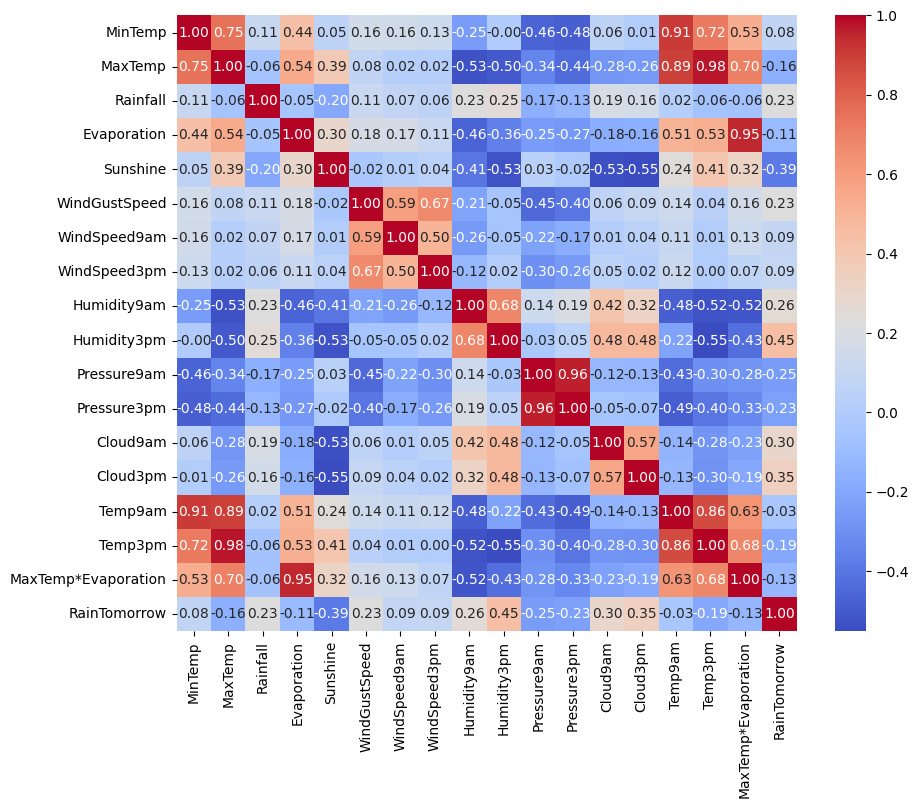

In [48]:
# plot the correlation matrix of numerical columns and the target variable
plt.figure(figsize=(10, 8))
sns.heatmap(dataset[numerical_columns + ['RainTomorrow']].corr(), annot=True, cmap="coolwarm", fmt=".2f")

### Drop highly correlated features

In [49]:
highly_correlated_features = []
correlation_matrix = dataset[numerical_columns].corr()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.85:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.append(colname)

highly_correlated_features

['Pressure3pm',
 'Temp9am',
 'Temp9am',
 'Temp3pm',
 'Temp3pm',
 'MaxTemp*Evaporation']

In [50]:
dataset = dataset.drop(columns=highly_correlated_features)
dataset.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
0,0.110640,-0.086404,-0.206249,-0.143797,0.201189,0.264885,0.596400,0.544730,0.156178,-1.403475,...,False,False,False,False,False,False,False,True,False,False
2,0.750252,1.230451,-0.160504,-0.143797,0.201189,0.037593,-0.898824,0.080048,0.730960,-0.869776,...,True,False,False,False,False,False,False,False,False,False
7,0.500647,-0.254514,-0.023267,-0.143797,0.201189,-0.720049,0.021314,-0.733144,1.096730,1.944269,...,False,False,False,False,False,False,False,False,False,True
8,-0.014162,-0.352577,0.136842,-0.143797,0.201189,0.264885,1.056469,0.080048,-0.157340,-0.384596,...,False,False,False,False,True,False,False,False,False,True
10,0.219842,-0.366586,-0.274867,-0.143797,0.201189,-1.401926,-0.438755,-1.197826,0.051672,1.507607,...,False,False,False,False,False,False,False,False,False,False


### Using Recursive Feature Elimination

In [ ]:
# use recursive feature elimination with cross-validation to select the best features
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

X = dataset.drop(columns=['RainTomorrow'])
y = dataset['RainTomorrow']

# use 50% of the data for training data
X = X.sample(frac=0.5, random_state=42)
y = y.loc[X.index]

model = RandomForestClassifier(random_state=42)
selector = RFECV(model, step=1, cv=3, n_jobs=-1)
selector = selector.fit(X, y)

selected_features = X.columns[selector.support_]

selected_features

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Cloud9am', 'Cloud3pm', 'Location_Albany',
       'Location_Albury', 'Location_Ballarat', 'Location_Bendigo',
       'Location_Brisbane', 'Location_Cairns', 'Location_Canberra',
       'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor',
       'Location_Darwin', 'Location_Hobart', 'Location_Melbourne',
       'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree',
       'Location_MountGambier', 'Location_NorfolkIsland', 'Location_Nuriootpa',
       'Location_PearceRAAF', 'Location_Perth', 'Location_PerthAirport',
       'Location_Portland', 'Location_Richmond', 'Location_Sale',
       'Location_Sydney', 'Location_SydneyAirport', 'Location_WaggaWagga',
       'Location_Watsonia', 'Location_Williamtown', 'Location_Wollongong',
       'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'Wi

#### Features that were not selected

In [ ]:
set(X.columns) - set(selected_features)

{'Location_AliceSprings',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Townsville',
 'Location_Uluru',
 'Location_Woomera'}

### Using Feature Importance

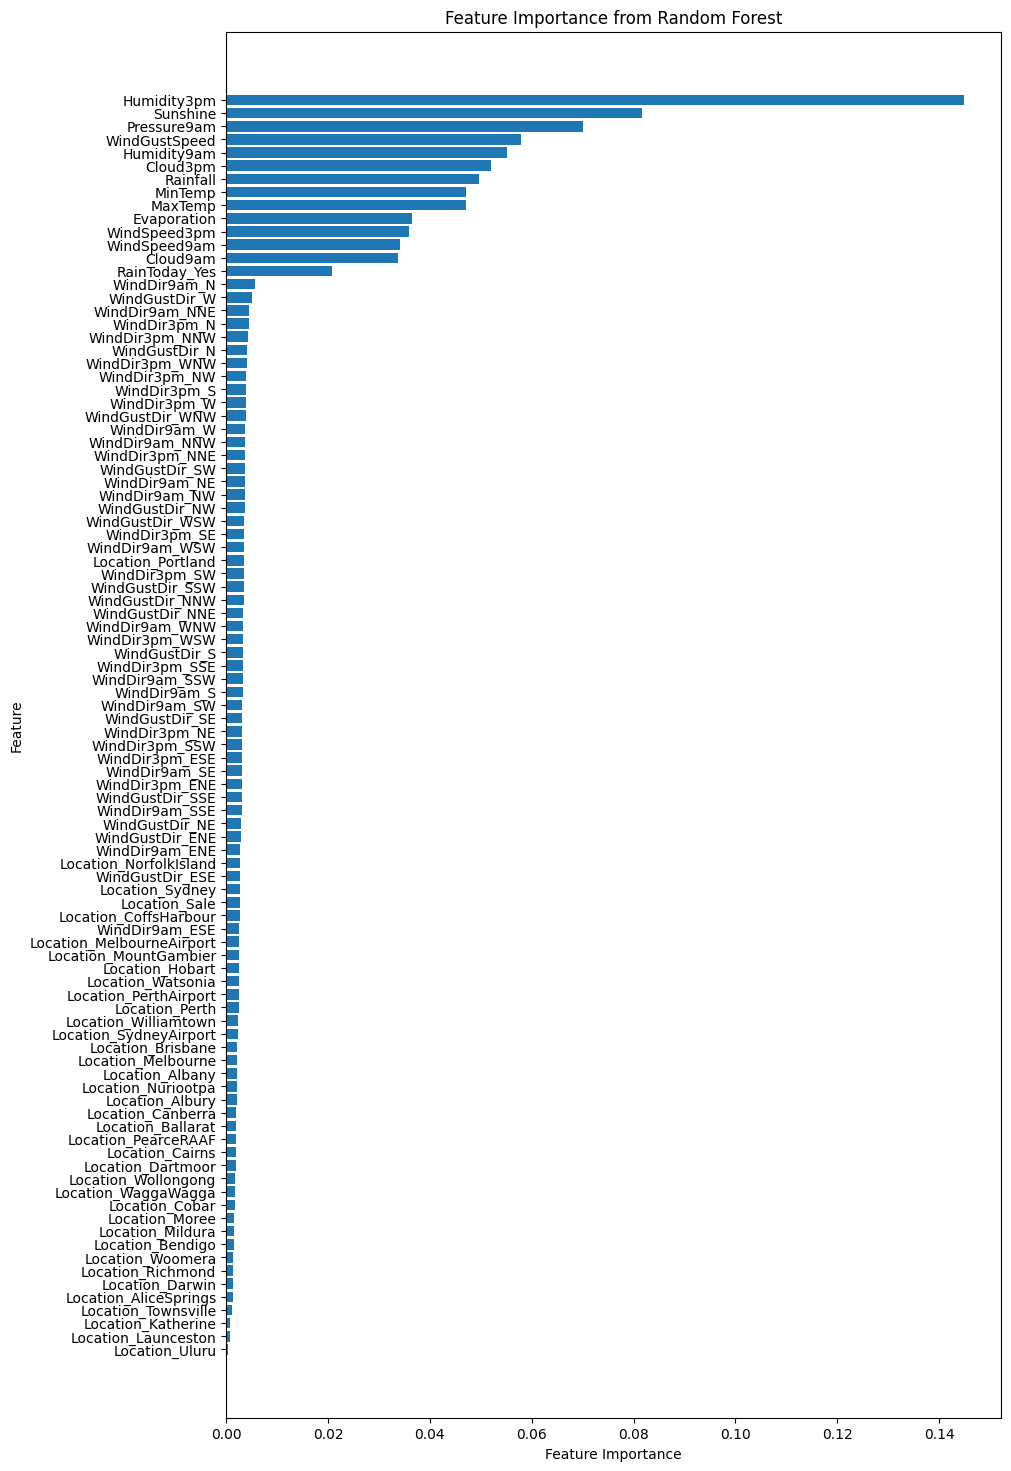

In [ ]:
# plot the feature importances
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = model.feature_importances_
indices = np.argsort(importances)[::]

plt.figure(figsize=(10, 18))
# feature importance and the importance of the feature infront of it
plt.barh(X.columns[indices], importances[indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()

### Select the best features

In [78]:
# select the best features
X_org = dataset[selected_features]
y_org = dataset['RainTomorrow']

X_org.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
0,0.110640,-0.086404,-0.206249,-0.143797,0.201189,0.264885,0.596400,0.544730,0.156178,-1.403475,...,False,False,False,False,False,False,False,True,False,False
2,0.750252,1.230451,-0.160504,-0.143797,0.201189,0.037593,-0.898824,0.080048,0.730960,-0.869776,...,True,False,False,False,False,False,False,False,False,False
7,0.500647,-0.254514,-0.023267,-0.143797,0.201189,-0.720049,0.021314,-0.733144,1.096730,1.944269,...,False,False,False,False,False,False,False,False,False,True
8,-0.014162,-0.352577,0.136842,-0.143797,0.201189,0.264885,1.056469,0.080048,-0.157340,-0.384596,...,False,False,False,False,True,False,False,False,False,True
10,0.219842,-0.366586,-0.274867,-0.143797,0.201189,-1.401926,-0.438755,-1.197826,0.051672,1.507607,...,False,False,False,False,False,False,False,False,False,False


### Visualize class distribution

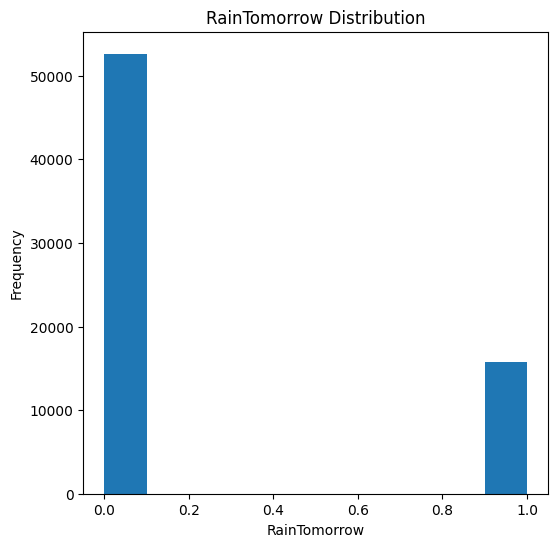

In [79]:
plt.figure(figsize=(6, 6))
plt.hist(y_org)
plt.xlabel('RainTomorrow')
plt.ylabel('Frequency')
plt.title('RainTomorrow Distribution')
plt.show()

## Training the model

### Reusable function for training the model

In [104]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print("Accuracy:", accuracy)
    print("\nClassification Report:")
    print(classification_report(y, y_pred))

    plot_confusion_matrix(y, y_pred)


def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["No Rain", "Rain"], yticklabels=["No Rain", "Rain"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()


def get_best_params(model, param_grid, X, y):
    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='f1')
    grid_search.fit(X, y)
    return grid_search.best_params_


def train_and_evaluate_model(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)

    print("Training Performance:")
    evaluate_model(model, X_train, y_train)

    print("\n\nTest Performance:")
    evaluate_model(model, X_test, y_test)


### Train Logistic Regression

Simple Logistic Regression Model:
Training Performance:
Accuracy: 0.75619880046811

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.73      0.82     42212
           1       0.48      0.85      0.61     12476

    accuracy                           0.76     54688
   macro avg       0.71      0.79      0.72     54688
weighted avg       0.84      0.76      0.77     54688



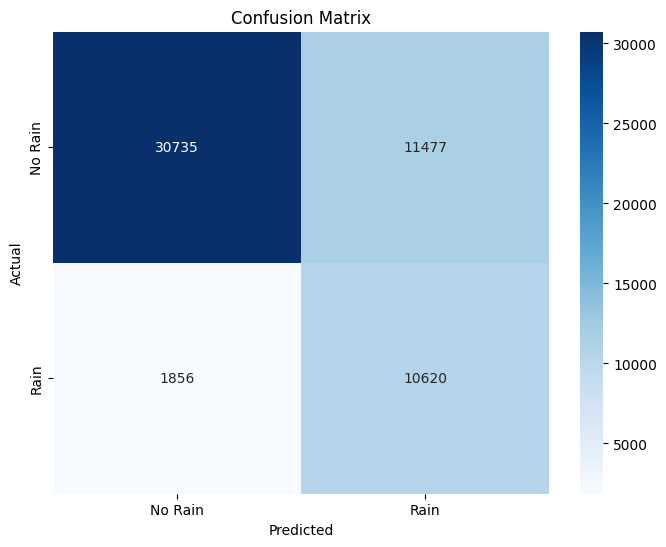



Test Performance:
Accuracy: 0.761337039204213

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.73      0.82     10427
           1       0.50      0.85      0.63      3245

    accuracy                           0.76     13672
   macro avg       0.72      0.79      0.73     13672
weighted avg       0.83      0.76      0.78     13672



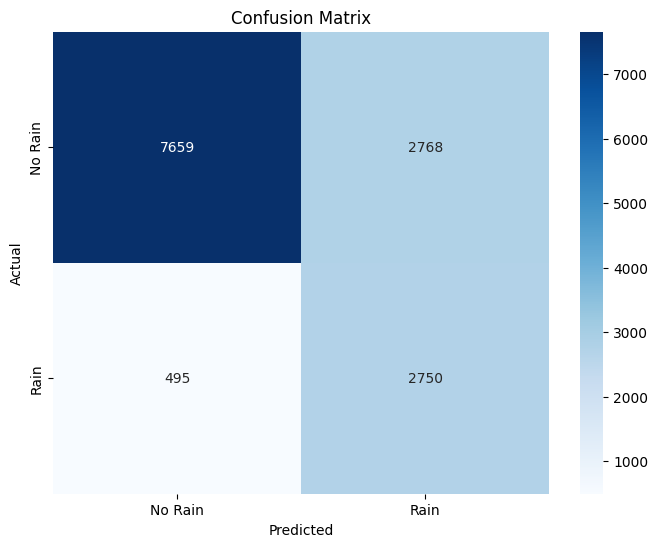

In [105]:
from sklearn.linear_model import LogisticRegression

print("Simple Logistic Regression Model:")
# give more weight to 1 class
model = LogisticRegression(class_weight={0: 1, 1: 5}, random_state=42)
train_and_evaluate_model(model, X_org, y_org)

### Train Logistic Regression with GridSearchCV

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for Logistic Regression: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

Logistic Regression Model with Best Parameters:
Training Performance:
Accuracy: 0.753821679344646

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.73      0.82     42212
           1       0.48      0.85      0.61     12476

    accuracy                           0.75     54688
   macro avg       0.71      0.79      0.72     54688
weighted avg       0.84      0.75      0.77     54688



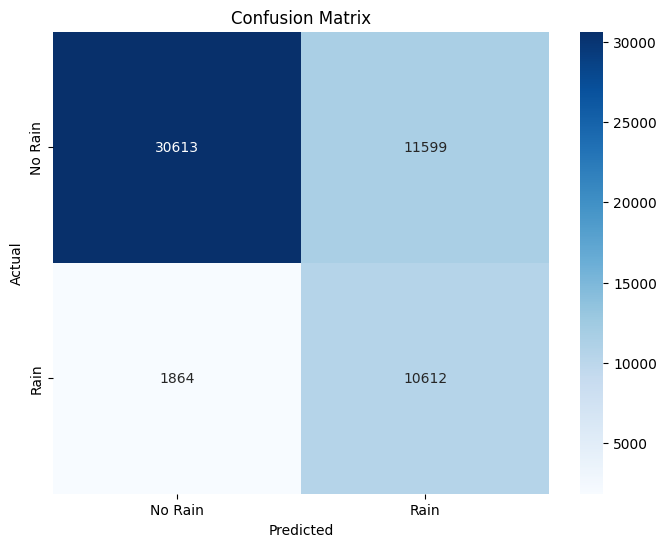



Test Performance:
Accuracy: 0.758703920421299

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.73      0.82     10427
           1       0.50      0.85      0.63      3245

    accuracy                           0.76     13672
   macro avg       0.72      0.79      0.72     13672
weighted avg       0.83      0.76      0.78     13672



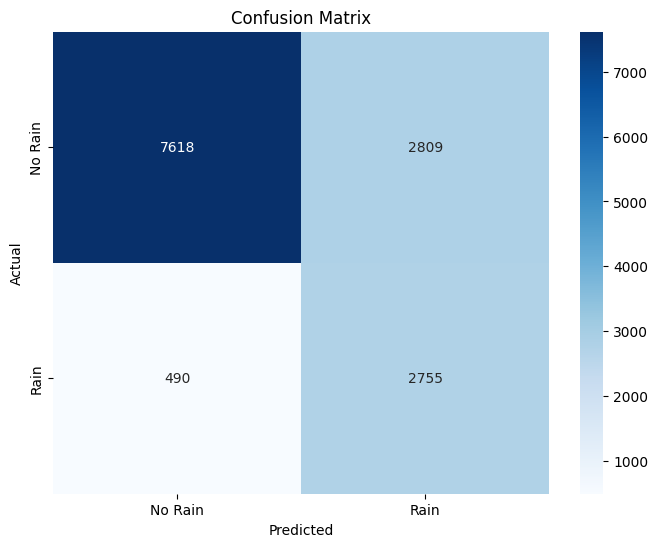

In [106]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

model = LogisticRegression(random_state=42, class_weight={0: 1, 1: 5})
best_params = get_best_params(model, param_grid, X_org, y_org)

print("Best Parameters for Logistic Regression:", best_params)

model = LogisticRegression(**best_params, random_state=42, class_weight={0: 1, 1: 5})
print("\nLogistic Regression Model with Best Parameters:")
train_and_evaluate_model(model, X_org, y_org)

### Train Random Forest

Simple Random Forest Model:
Training Performance:
Accuracy: 0.7595267700409596

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.72      0.82     42212
           1       0.49      0.89      0.63     12476

    accuracy                           0.76     54688
   macro avg       0.72      0.81      0.73     54688
weighted avg       0.85      0.76      0.78     54688



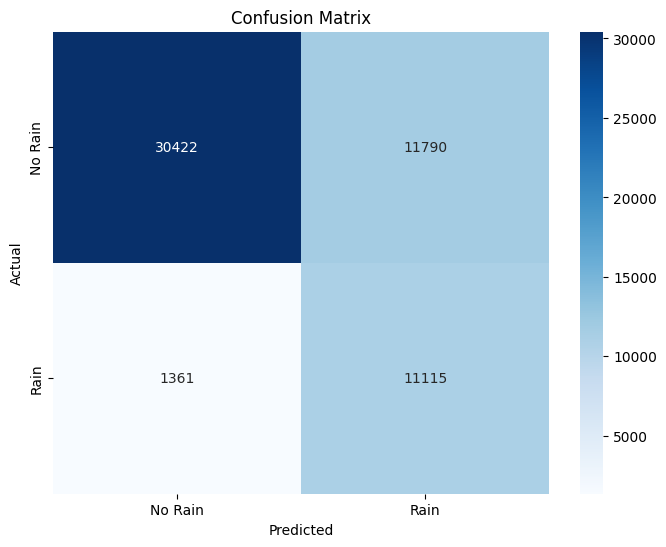



Test Performance:
Accuracy: 0.7498537156231715

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.72      0.81     10427
           1       0.48      0.85      0.62      3245

    accuracy                           0.75     13672
   macro avg       0.71      0.78      0.72     13672
weighted avg       0.83      0.75      0.77     13672



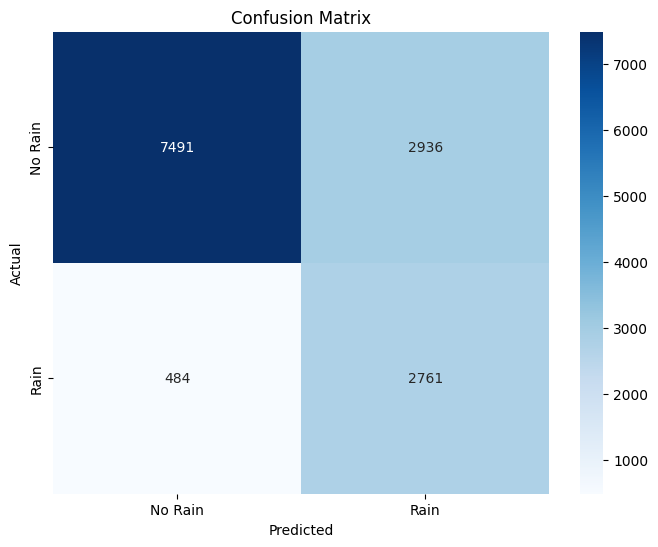

In [107]:
from sklearn.ensemble import RandomForestClassifier

print("Simple Random Forest Model:")
model = RandomForestClassifier(random_state=42, min_samples_split=5, n_estimators=100, max_depth=10, class_weight={0: 1, 1: 5})
train_and_evaluate_model(model, X_org, y_org)

### Train Random Forest with GridSearchCV

Fitting 5 folds for each of 81 candidates, totalling 405 fits


A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


Best Parameters for Random Forest: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}

Random Forest Model with Best Parameters:
Training Performance:
Accuracy: 0.9172578993563487

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.94     42212
           1       0.75      0.96      0.84     12476

    accuracy                           0.92     54688
   macro avg       0.87      0.93      0.89     54688
weighted avg       0.93      0.92      0.92     54688



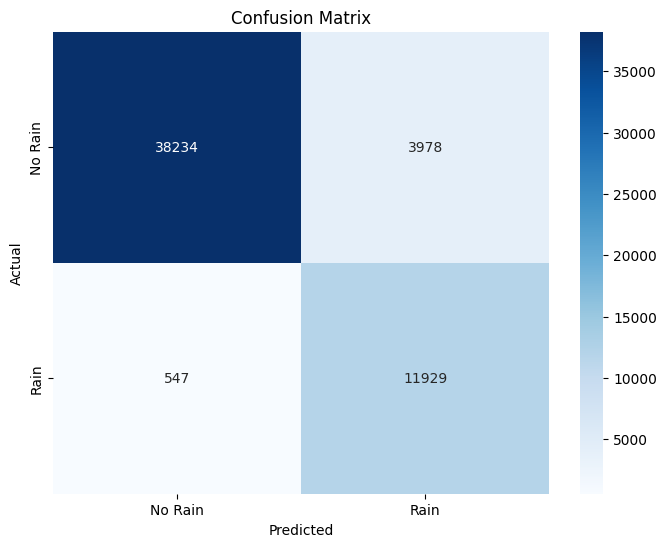



Test Performance:
Accuracy: 0.8304564072557051

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.89     10427
           1       0.62      0.74      0.67      3245

    accuracy                           0.83     13672
   macro avg       0.77      0.80      0.78     13672
weighted avg       0.84      0.83      0.84     13672



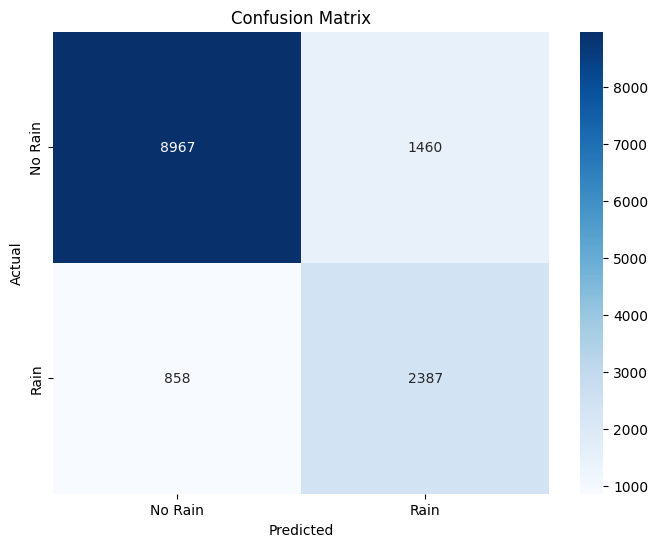

In [108]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model = RandomForestClassifier(random_state=42, class_weight={0: 1, 1: 5})
best_params = get_best_params(model, param_grid, X_org, y_org)

print("Best Parameters for Random Forest:", best_params)

model = RandomForestClassifier(**best_params, random_state=42, class_weight={0: 1, 1: 5})
print("\nRandom Forest Model with Best Parameters:")
train_and_evaluate_model(model, X_org, y_org)

# Bonus

## Pair plot of the selected features

In [ ]:
selected_dataset = dataset[list(selected_features) + ['RainTomorrow']]
sns.pairplot(selected_dataset, hue='RainTomorrow')
plt.show()

## Shap to explain the model

In [ ]:
# shap to explain the model predictions
import shap

model = RandomForestClassifier(**best_params, random_state=42, class_weight={0: 1, 1: 5})
model.fit(X_org, y_org)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_org)

shap.summary_plot(shap_values[1], X_org)

## Correlation heatmap

In [ ]:
corr = selected_dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()